In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.1)

model.save('mnist_model.h5')


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 64s 65ms/step - accuracy: 0.8592 - loss: 0.4577 - val_accuracy: 0.9870 - val_loss: 0.0455
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 80s 63ms/step - accuracy: 0.9823 - loss: 0.0540 - val_accuracy: 0.9857 - val_loss: 0.0542
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 80s 61ms/step - accuracy: 0.9886 - loss: 0.0366 - val_accuracy: 0.9912 - val_loss: 0.0317
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 81s 60ms/step - accuracy: 0.9909 - loss: 0.0285 - val_accuracy: 0.9905 - val_loss: 0.0337
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 82s 60ms/step - accuracy: 0.9931 - loss: 0.0208 - val_accuracy: 0.9922 - val_loss: 0.0286


313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.9892 - loss: 0.0338
Test accuracy of loaded model: 0.9907
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step


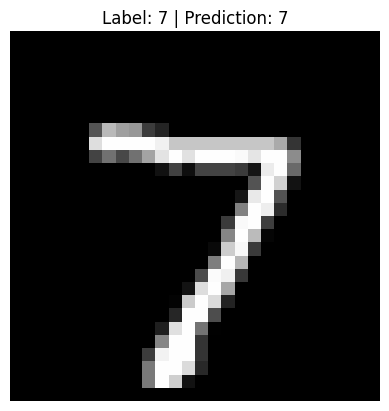

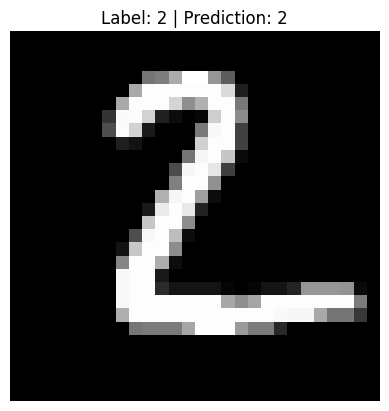

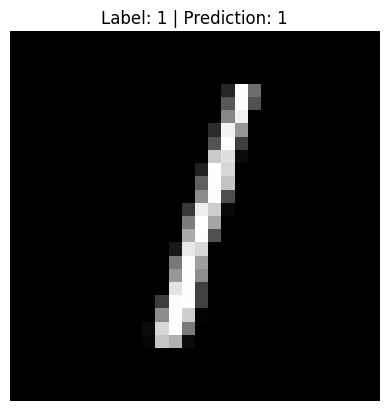

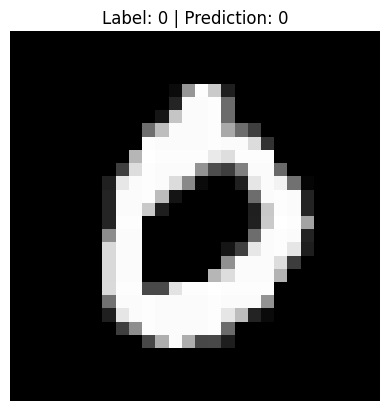

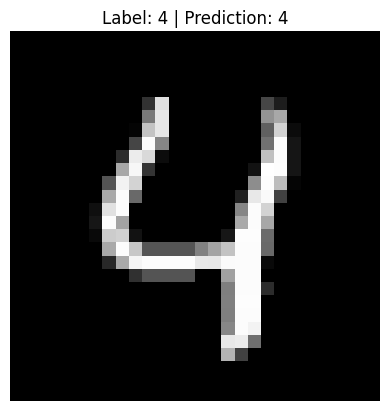

In [ ]:
from tensorflow.keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt

loaded_model = load_model('mnist_model.h5')

test_loss, test_acc = loaded_model.evaluate(x_test, y_test)
print(f'Test accuracy of loaded model: {test_acc:.4f}')

def display_image_prediction(image, label, prediction):
    plt.imshow(image.squeeze(), cmap='gray')
    plt.title(f'Label: {np.argmax(label)} | Prediction: {np.argmax(prediction)}')
    plt.axis('off')
    plt.show()

predictions = loaded_model.predict(x_test)
for i in range(5):
    display_image_prediction(x_test[i], y_test[i], predictions[i])
